In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
import geopandas as gpd
import numpy as np


# Load data

In [2]:
aact_data = pd.read_csv("data/combined_neuro_trials_with_interventions_20240307.csv")

In [4]:
aact_data.shape

(112900, 14)

In [5]:
aact_data.columns

Index(['nct_id', 'Neurological Disease', 'Disease Class', 'brief_title',
       'study_official_title', 'brief_summary_description', 'start_date',
       'completion_date', 'phase', 'study_type', 'overall_status',
       'country_name', 'intervention_name', 'intervention_type'],
      dtype='object')

In [7]:
len(set(aact_data['nct_id']))

32803

In [8]:
aact_data.head(5)

,nct_id,Neurological Disease,Disease Class,brief_title,study_official_title,brief_summary_description,start_date,completion_date,phase,study_type,overall_status,country_name,intervention_name,intervention_type
0,NCT02970292,Schizophrenia,Diseases of the nervous system,Efficacy and Safety of Adjunctive Pimavanserin...,"A Phase 3, Randomized, Double-Blind, Placebo-C...",To evaluate the efficacy and safety of adjunct...,2016-10-26,2019-06-25,Phase 3,Interventional,Completed,Ukraine,Placebo,Drug
1,NCT03767426,Sleep Deprivation,Sleep Wake Disorders,The Effect of Sleep Deprivation and Recovery S...,The Effect of Sleep Deprivation and Recovery S...,To further understand the impact of acute slee...,2019-03-01,2023-12-31,Not Applicable,Interventional,Recruiting,United States,Daytime nap,Behavioral
2,NCT03941067,Neuromuscular Diseases,Neuromuscular Diseases,Effects of Pre-event Massage Over the Neuromus...,Effects of Pre-event Massage Over the Neuromus...,The study observes the effect of a pre-event m...,2019-05-02,2019-06-07,Not Applicable,Interventional,Unknown status,Spain,Pre-event massage,Other
3,NCT03542357,Migraine,Diseases of the nervous system|Central Nervous...,The Effect of Sumatriptan and Placebo on CGRP ...,The Effect of Sumatriptan and Placebo on CGRP ...,To develop a pragmatic migraine model the inve...,2018-02-15,2018-09-01,Not Applicable,Interventional,Completed,Denmark,Placebo Oral Tablet,Drug
4,NCT02776553,Sarcopenia,Neurologic Manifestations,A Physical Activity Program in End-state Liver...,A Physical Activity Program in End-stage Liver...,The primary aim of this study is to improve bo...,2016-06-30,2020-06-30,Not Applicable,Interventional,Completed,United States,Nutritional consultation,Other


# General

In [54]:
aact_metadata = aact_data[['nct_id','start_date','completion_date','phase','overall_status','country_name']]
# Convert 'start_date' and 'completion_date' to datetime
aact_metadata['start_date'] = pd.to_datetime(aact_metadata['start_date'])
aact_metadata['completion_date'] = pd.to_datetime(aact_metadata['completion_date'])

# Extract the year from 'start_date' and 'completion_date'
aact_metadata['start_year'] = aact_metadata['start_date'].dt.year
aact_metadata['completion_year'] = aact_metadata['completion_date'].dt.year

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_60791/2693528108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aact_metadata['start_date'] = pd.to_datetime(aact_metadata['start_date'])
/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_60791/2693528108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aact_metadata['completion_date'] = pd.to_datetime(aact_metadata['completion_date'])
/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_60791/2693528108.py:7: SettingWithCopyW

In [56]:
unique_rows_years = aact_metadata.drop_duplicates(subset=['nct_id', 'start_year', 'completion_year'])
unique_rows_years

,nct_id,start_date,completion_date,phase,overall_status,country_name,start_year,completion_year
0,NCT02970292,2016-10-26,2019-06-25,Phase 3,Completed,Ukraine,2016.0,2019.0
1,NCT03767426,2019-03-01,2023-12-31,Not Applicable,Recruiting,United States,2019.0,2023.0
2,NCT03941067,2019-05-02,2019-06-07,Not Applicable,Unknown status,Spain,2019.0,2019.0
3,NCT03542357,2018-02-15,2018-09-01,Not Applicable,Completed,Denmark,2018.0,2018.0
4,NCT02776553,2016-06-30,2020-06-30,Not Applicable,Completed,United States,2016.0,2020.0
...,...,...,...,...,...,...,...,...
112871,NCT03166449,2014-07-01,2015-07-31,Not Applicable,Completed,Malaysia,2014.0,2015.0
112875,NCT02394639,2015-04-30,2016-09-30,Not Applicable,Withdrawn,Belgium,2015.0,2016.0
112876,NCT03294629,2015-03-31,2016-03-31,Not Applicable,Completed,NaN,2015.0,2016.0
112877,NCT05230394,2023-08-31,2023-12-31,Not Applicable,Suspended,Canada,2023.0,2023.0


## Phases and Status

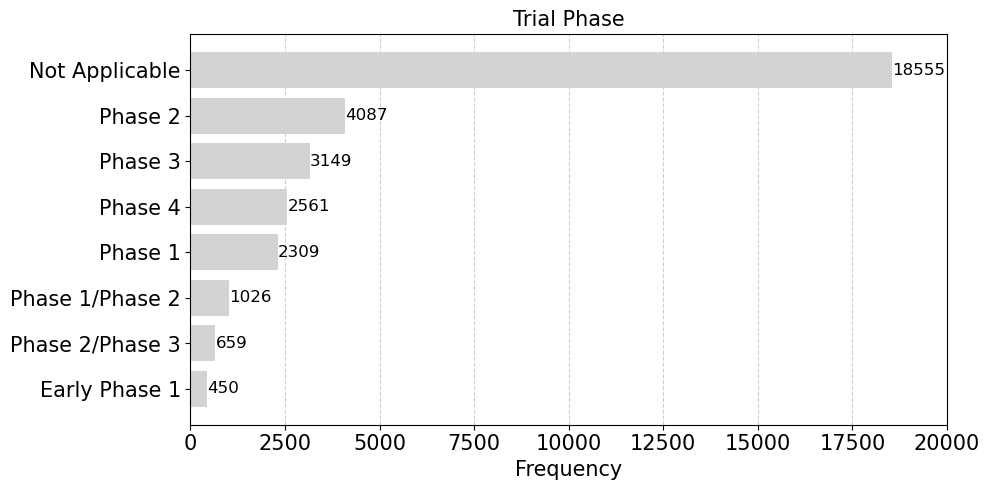

In [77]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = aact_metadata[['nct_id', 'phase']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['phase'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title('Trial Phase', fontsize=15)
plt.xlim(0, 20000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/phase_frequency.pdf')

# Display the chart
plt.show()

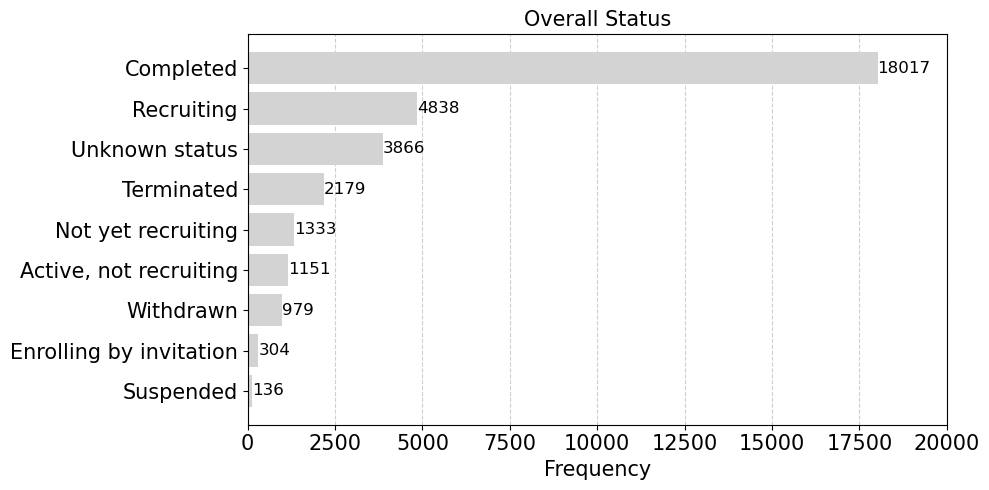

In [32]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = aact_metadata[['nct_id', 'overall_status']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['overall_status'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title('Overall Status', fontsize=15)
plt.xlim(0, 20000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/status_frequency.pdf')

# Display the chart
plt.show()

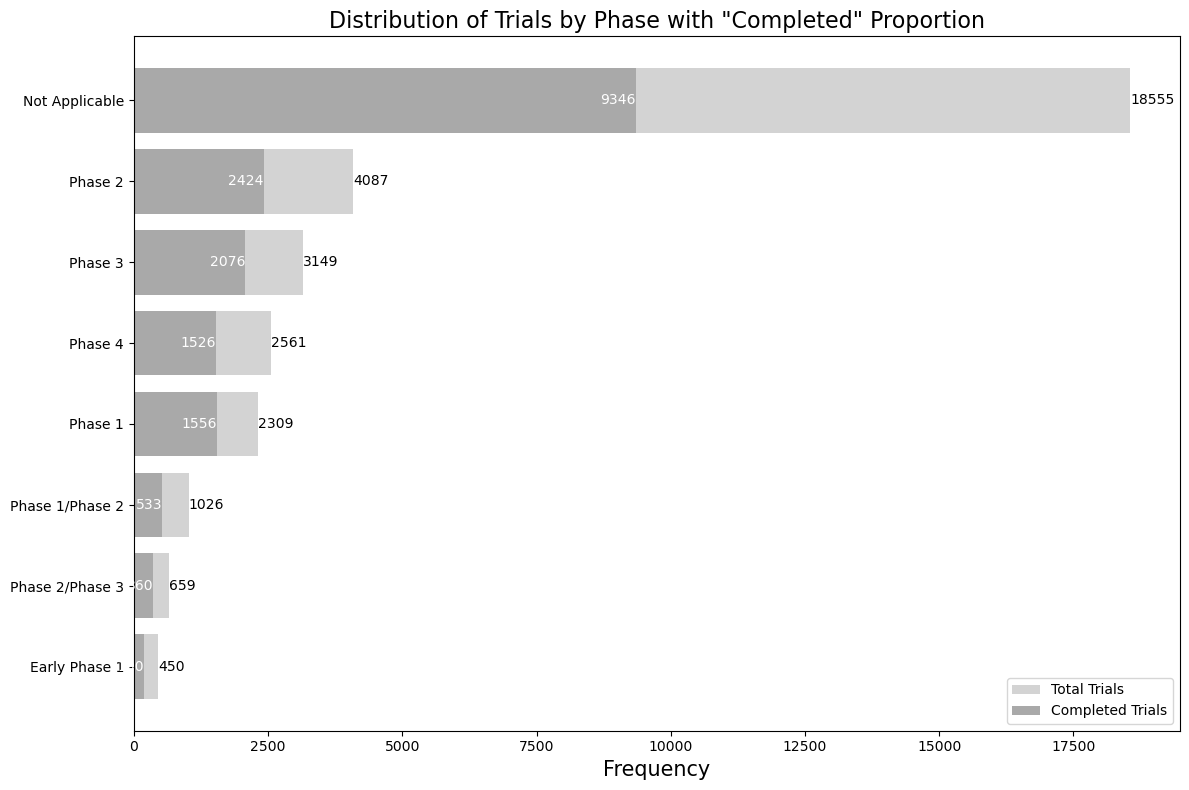

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming aact_metadata is your DataFrame

# Step 1: Count total trials per phase, ensuring unique nct_id within each phase
total_phase_counts = aact_metadata[['nct_id', 'phase']].drop_duplicates()['phase'].value_counts()

# Step 2: Filter 'Completed' status and count completed trials per phase, ensuring unique nct_id
completed_trials = aact_metadata[aact_metadata['overall_status'] == 'Completed']
completed_phase_counts = completed_trials[['nct_id', 'phase']].drop_duplicates()['phase'].value_counts()

# Sorting total_phase_counts in descending order to determine plot order
sorted_phases = total_phase_counts.sort_values(ascending=True).index

# Reindexing completed_phase_counts according to sorted_phases for alignment
completed_phase_counts = completed_phase_counts.reindex(index=sorted_phases).fillna(0)

# Step 3: Plot a horizontal stacked bar chart
plt.figure(figsize=(12, 8))

# Plotting total trials
bars_total = plt.barh(sorted_phases, total_phase_counts.reindex(index=sorted_phases), color='lightgrey', label='Total Trials')

# Plotting completed trials on top of the total trials
bars_completed = plt.barh(sorted_phases, completed_phase_counts, color='darkgrey', label='Completed Trials')

plt.xlabel('Frequency', fontsize=15)
plt.title('Distribution of Trials by Phase with "Completed" Proportion', fontsize=16)
plt.legend()

# Adding labels to the bars
for bar in bars_total:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center', ha='left')

for bar in bars_completed:
    width = bar.get_width()
    # Only label the bar if the width is significant to avoid clutter
    if width > 0:
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', ha='right', color='white')

plt.tight_layout()
plt.show()


## Start and Completion Years

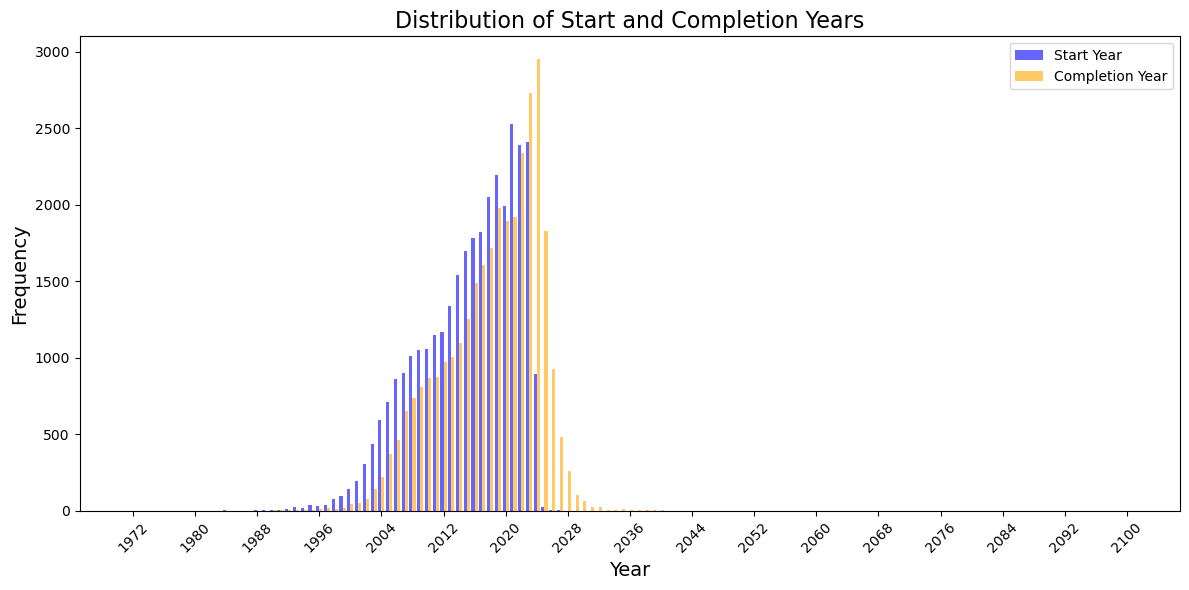

In [68]:
# Ensure year values are integers and calculate the range for x-ticks
start_min_year = int(unique_rows_years['start_year'].min())
start_max_year = int(unique_rows_years['start_year'].max())
completion_min_year = int(unique_rows_years['completion_year'].min())
completion_max_year = int(unique_rows_years['completion_year'].max())

year_range = range(min(start_min_year, completion_min_year), max(start_max_year, completion_max_year) + 1)

# Adjusting the plotting code for improved year readability
plt.figure(figsize=(12, 6))

# Plotting both distributions with adjusted years for x-ticks
plt.bar(start_year_distribution.index - 0.2, start_year_distribution, color='blue', width=0.4, label='Start Year', alpha=0.6)
plt.bar(completion_year_distribution.index + 0.2, completion_year_distribution, color='orange', width=0.4, label='Completion Year', alpha=0.6)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Start and Completion Years', fontsize=16)

# Calculating the tick step based on the range of years to ensure readability
tick_step = max(1, len(year_range) // 15)  # Ensuring at least one tick step and not more than 10 labels
plt.xticks(ticks=[year for i, year in enumerate(year_range) if i % tick_step == 0], rotation=45)

plt.legend()
plt.tight_layout()

# Displaying the plot with adjusted x-axis ticks for better readability
plt.show()


In [33]:
country_event_frequency = aact_metadata.groupby('country_name')['nct_id'].nunique().reset_index(name='Frequency')
country_event_frequency

,country_name,Frequency
0,Afghanistan,2
1,Albania,2
2,Angola,1
3,Antigua and Barbuda,10
4,Argentina,283
...,...,...
141,Venezuela,11
142,Vietnam,43
143,Virgin Islands (U.S.),3
144,Zambia,2


## Countries

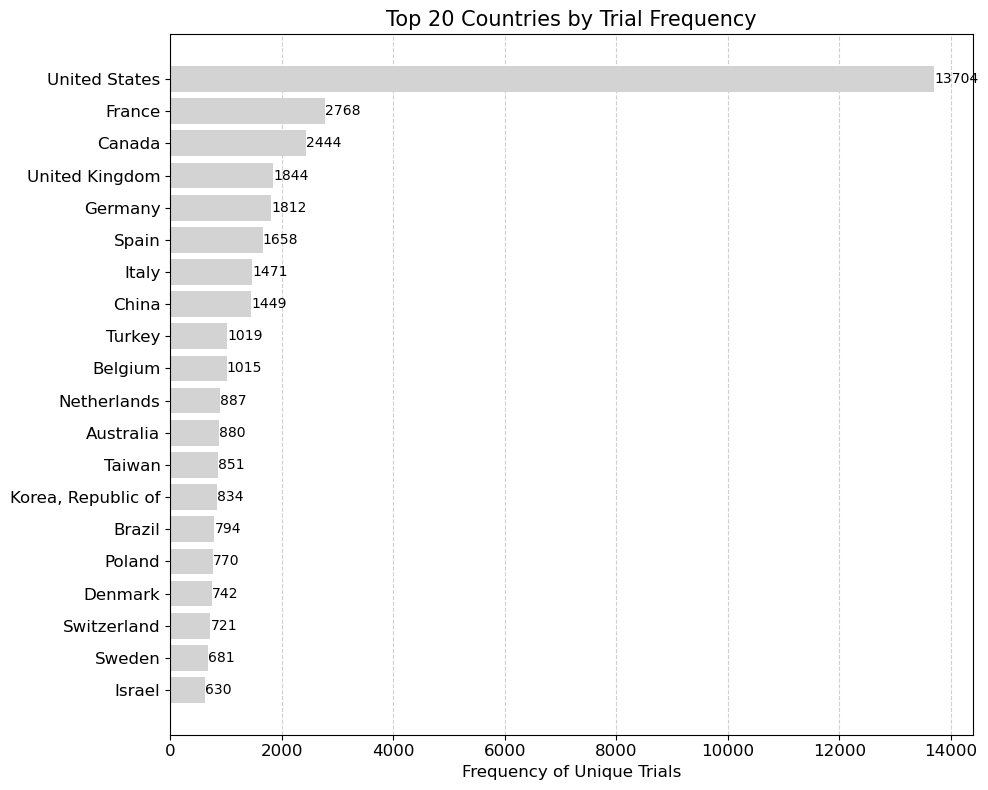

In [42]:
# Sorting the data by Frequency and selecting the top 20
extended_country_event_frequency_sorted = country_event_frequency.sort_values(by='Frequency', ascending=True).tail(20)

# Plotting the top 20 countries
plt.figure(figsize=(10, 8))
bars = plt.barh(extended_country_event_frequency_sorted['country_name'], extended_country_event_frequency_sorted['Frequency'], color='lightgrey', zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=10)
    
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency of Unique Trials', fontsize=12)
plt.title('Top 20 Countries by Trial Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('viz/contry_frequency.pdf')

# Display the chart
plt.show()

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_60791/3808609261.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


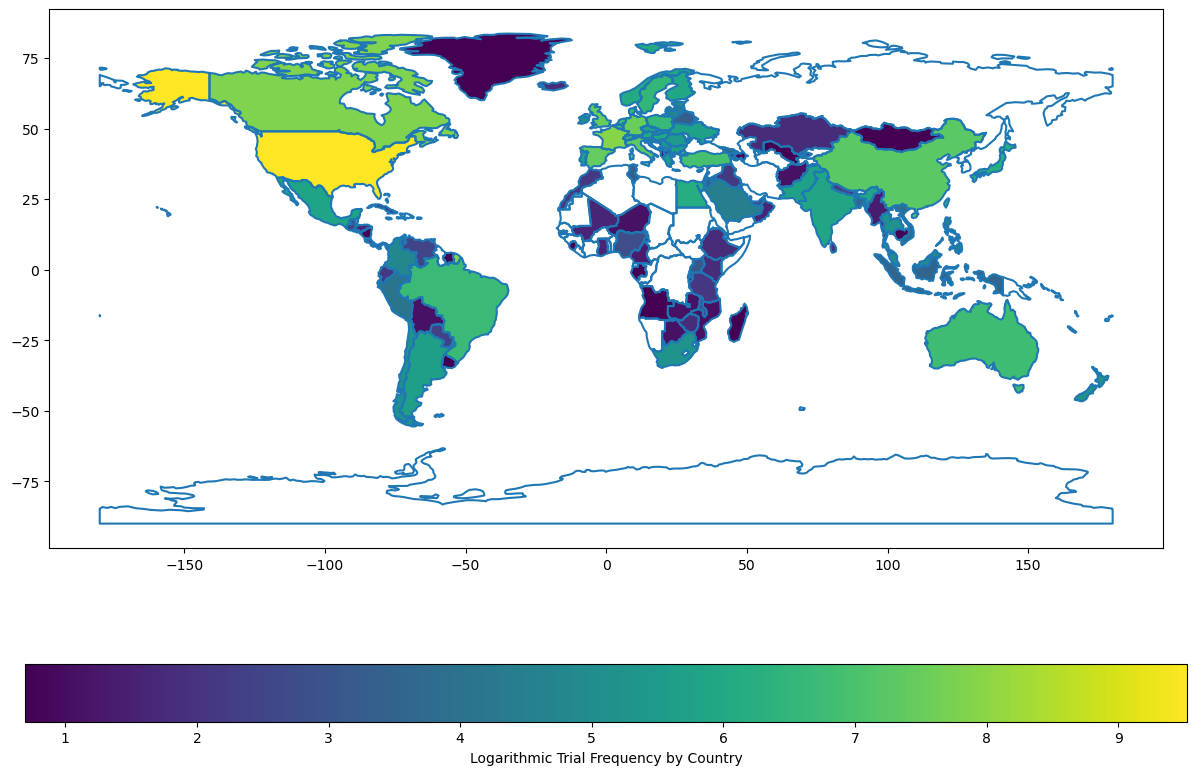

In [50]:
# Convert dictionary to DataFrame
event_df = country_event_frequency
event_df['country_name'] = event_df['country_name'].replace({'United States': 'United States of America'})

# Load world map (ensure you're using the correct method to access the 'naturalearth_lowres' data)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with event data
world = world.merge(event_df, how="left", left_on="name", right_on="country_name")

# Apply a logarithmic transformation to the 'Frequency' column to deal with wide ranges in data
world['Log_Frequency'] = np.log1p(world['Frequency'])

# Plotting with handling zeros as missing data (leaving them white)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

# Ensure that areas with zero (log1p(0) = 0) are left white by treating them as NaN
world['Log_Frequency'] = world['Log_Frequency'].replace(0, np.nan)

# Plot using the transformed 'Log_Frequency' column
# Setting missing_kwds to ensure NaN values (including those originally zeros) are plotted as white
world.plot(column='Log_Frequency', ax=ax, legend=True,
           missing_kwds={'color': 'white'},
           legend_kwds={'label': "Logarithmic Trial Frequency by Country",
                        'orientation': "horizontal"})

plt.savefig('viz/contry_frequency_map.pdf')

plt.show()


# Vis Diseases

In [73]:
aact_data.head(5)

,nct_id,Neurological Disease,Disease Class,brief_title,study_official_title,brief_summary_description,start_date,completion_date,phase,study_type,overall_status,country_name,intervention_name,intervention_type
0,NCT02970292,Schizophrenia,Diseases of the nervous system,Efficacy and Safety of Adjunctive Pimavanserin...,"A Phase 3, Randomized, Double-Blind, Placebo-C...",To evaluate the efficacy and safety of adjunct...,2016-10-26,2019-06-25,Phase 3,Interventional,Completed,Ukraine,Placebo,Drug
1,NCT03767426,Sleep Deprivation,Sleep Wake Disorders,The Effect of Sleep Deprivation and Recovery S...,The Effect of Sleep Deprivation and Recovery S...,To further understand the impact of acute slee...,2019-03-01,2023-12-31,Not Applicable,Interventional,Recruiting,United States,Daytime nap,Behavioral
2,NCT03941067,Neuromuscular Diseases,Neuromuscular Diseases,Effects of Pre-event Massage Over the Neuromus...,Effects of Pre-event Massage Over the Neuromus...,The study observes the effect of a pre-event m...,2019-05-02,2019-06-07,Not Applicable,Interventional,Unknown status,Spain,Pre-event massage,Other
3,NCT03542357,Migraine,Diseases of the nervous system|Central Nervous...,The Effect of Sumatriptan and Placebo on CGRP ...,The Effect of Sumatriptan and Placebo on CGRP ...,To develop a pragmatic migraine model the inve...,2018-02-15,2018-09-01,Not Applicable,Interventional,Completed,Denmark,Placebo Oral Tablet,Drug
4,NCT02776553,Sarcopenia,Neurologic Manifestations,A Physical Activity Program in End-state Liver...,A Physical Activity Program in End-stage Liver...,The primary aim of this study is to improve bo...,2016-06-30,2020-06-30,Not Applicable,Interventional,Completed,United States,Nutritional consultation,Other


In [74]:
aact_data.columns

Index(['nct_id', 'Neurological Disease', 'Disease Class', 'brief_title',
       'study_official_title', 'brief_summary_description', 'start_date',
       'completion_date', 'phase', 'study_type', 'overall_status',
       'country_name', 'intervention_name', 'intervention_type'],
      dtype='object')

In [76]:
aact_diseases = aact_data[['nct_id', 'Neurological Disease', 'Disease Class', 'phase', 'overall_status']]

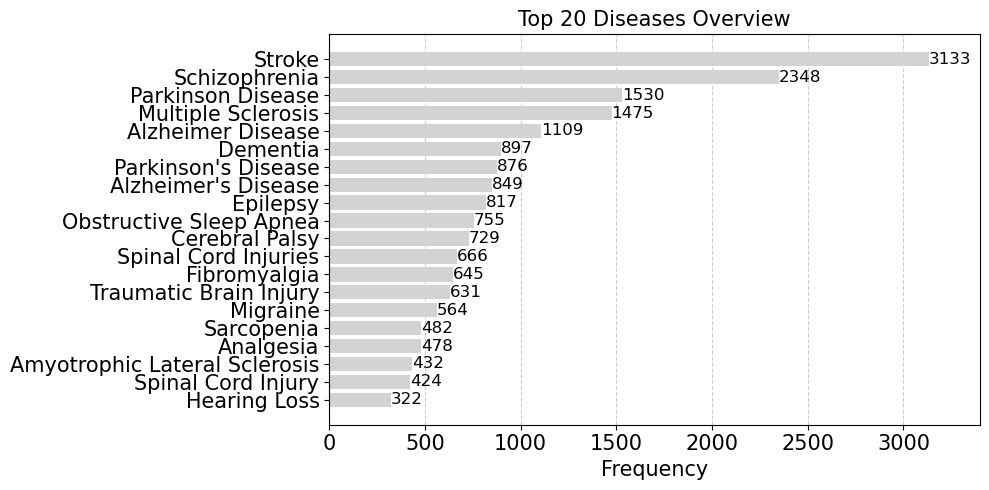

In [88]:
# Keeping only unique nct_id, phase pairs
unique_pairs = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs['Neurological Disease'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True).tail(20)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title('Top 20 Diseases Overview', fontsize=15)
plt.xlim(0, 3400) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/disease_frequency.pdf')

# Display the chart
plt.show()

In [92]:
# Step 1: Count total trials per disease
total_disease_counts = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Filter 'Completed' status and count completed trials per disease
completed_trials = aact_diseases[aact_diseases['overall_status'] == 'Completed']
completed_disease_counts = completed_trials[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Calculate proportions of completed trials
completed_proportions = (completed_disease_counts / total_disease_counts).fillna(0) * 100  # Proportion in percentage

# Sorting to get top 20 diseases by total count
sorted_diseases = total_disease_counts.sort_values(ascending=True).tail(20)
sorted_completed_proportions = completed_proportions.reindex(index=sorted_diseases.index)
sorted_completed_proportions

Neurological Disease
Hearing Loss                     58.695652
Spinal Cord Injury               61.792453
Amyotrophic Lateral Sclerosis    49.537037
Analgesia                        46.025105
Sarcopenia                       48.547718
Migraine                         61.524823
Traumatic Brain Injury           43.423138
Fibromyalgia                     65.426357
Spinal Cord Injuries             36.186186
Cerebral Palsy                   56.515775
Obstructive Sleep Apnea          55.496689
Epilepsy                         60.587515
Alzheimer's Disease              69.022379
Parkinson's Disease              66.894977
Dementia                         52.954292
Alzheimer Disease                46.257890
Multiple Sclerosis               55.593220
Parkinson Disease                45.947712
Schizophrenia                    68.185690
Stroke                           52.282158
Name: count, dtype: float64

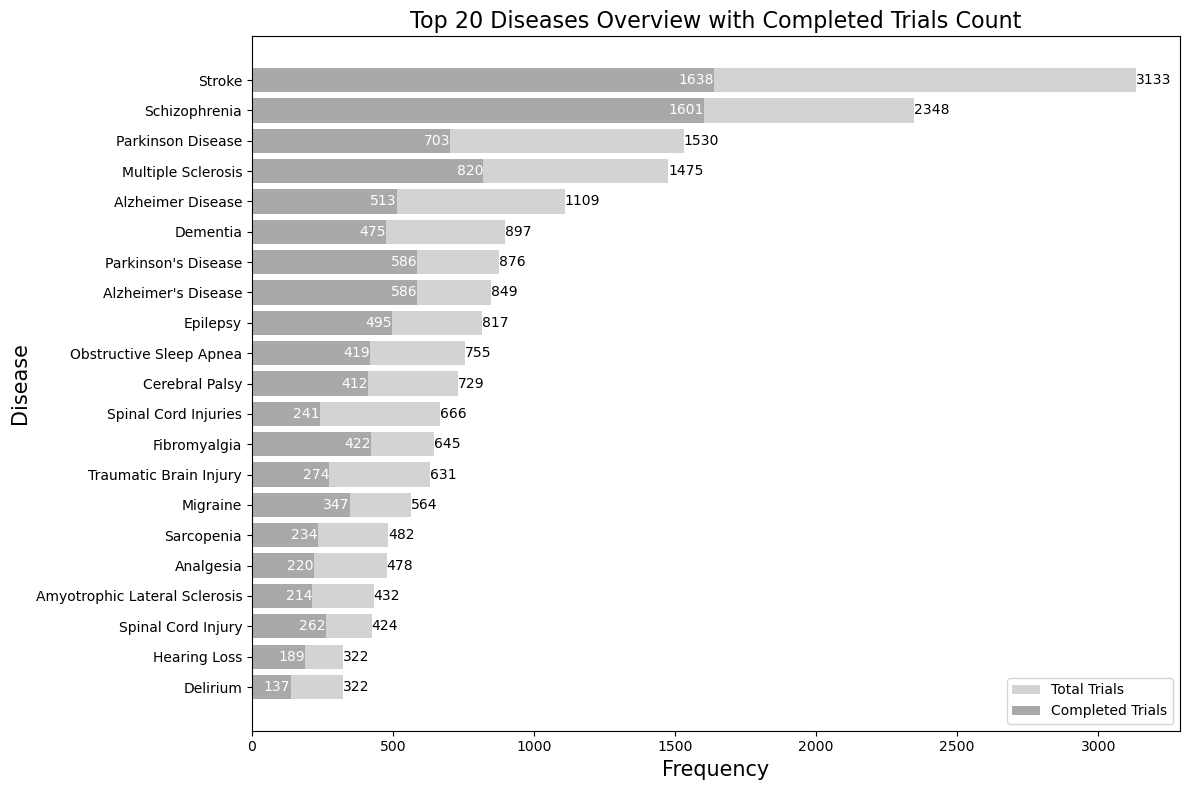

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Count total trials per disease, ensuring unique nct_id within each disease
total_disease_counts = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Step 2: Filter 'Completed' status and count completed trials per disease, ensuring unique nct_id
completed_trials = aact_diseases[aact_diseases['overall_status'] == 'Completed']
completed_disease_counts = completed_trials[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Sorting total_disease_counts in descending order to determine plot order and select top diseases
sorted_diseases = total_disease_counts.sort_values(ascending=True).tail(21).index

# Reindexing completed_disease_counts according to sorted_diseases for alignment
completed_disease_counts = completed_disease_counts.reindex(index=sorted_diseases).fillna(0)

# Step 3: Plot a horizontal bar chart
plt.figure(figsize=(12, 8))

# Plotting total trials
bars_total = plt.barh(sorted_diseases, total_disease_counts[sorted_diseases], color='lightgrey', label='Total Trials')

# Plotting completed trials
bars_completed = plt.barh(sorted_diseases, completed_disease_counts[sorted_diseases], color='darkgrey', label='Completed Trials')

plt.ylabel('Disease', fontsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.title('Top 20 Diseases Overview with Completed Trials Count', fontsize=16)
plt.yticks(ticks=range(len(sorted_diseases)), labels=sorted_diseases)
plt.legend()

# Adding labels to the bars
for bar in bars_total:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center', ha='left')

for bar in bars_completed:
    width = bar.get_width()
    # Only label the bar if the width is significant to avoid clutter
    if width > 0:
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', ha='right', color='white')

plt.tight_layout()
plt.show()


In [103]:
aact_diseases['phase'].isnull().sum()

13

## Disease/ Phase

In [105]:
# Aggregate trials by disease and phase, counting unique nct_ids
disease_phase_counts = aact_diseases.groupby(['Neurological Disease', 'phase'])['nct_id'].nunique().reset_index()

# Pivot the data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df = disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df['Total Trials'] = pivot_df.sum(axis=1)
top_20_diseases = pivot_df.sort_values('Total Trials', ascending=False).head(21)
top_20_diseases

phase,Early Phase 1,Not Applicable,Phase 1,Phase 1/Phase 2,Phase 2,Phase 2/Phase 3,Phase 3,Phase 4,Total Trials
Neurological Disease,,,,,,,,,
Stroke,37.0,2459.0,102.0,66.0,191.0,39.0,125.0,114.0,3133.0
Schizophrenia,20.0,933.0,258.0,49.0,280.0,42.0,358.0,408.0,2348.0
Parkinson Disease,20.0,1011.0,125.0,48.0,176.0,27.0,60.0,63.0,1530.0
Multiple Sclerosis,15.0,827.0,110.0,62.0,171.0,28.0,147.0,115.0,1475.0
Alzheimer Disease,33.0,557.0,169.0,33.0,166.0,19.0,93.0,39.0,1109.0
Dementia,3.0,696.0,27.0,14.0,56.0,17.0,45.0,39.0,897.0
Parkinson's Disease,13.0,344.0,119.0,31.0,174.0,19.0,107.0,69.0,876.0
Alzheimer's Disease,8.0,189.0,184.0,33.0,237.0,19.0,118.0,61.0,849.0
Epilepsy,8.0,357.0,87.0,13.0,108.0,6.0,152.0,86.0,817.0


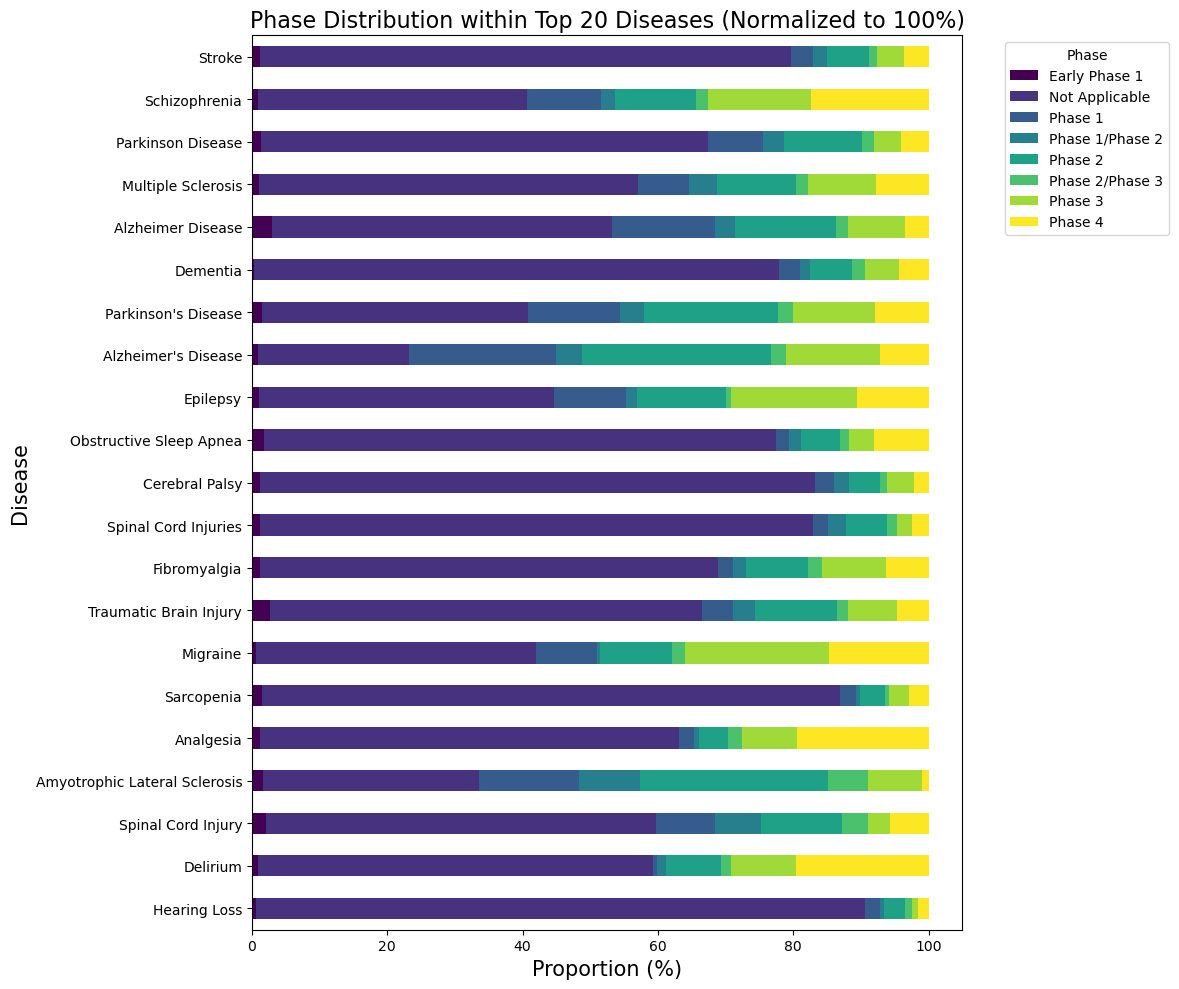

In [108]:
# Aggregate trials by disease and phase, counting unique nct_ids
disease_phase_counts = aact_diseases.groupby(['Neurological Disease', 'phase'])['nct_id'].nunique().reset_index()

# Pivot the data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df = disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df['Total Trials'] = pivot_df.sum(axis=1)
top_20_diseases = pivot_df.sort_values('Total Trials', ascending=False).head(21)

# Drop the 'Total Trials' column as it's no longer needed for plotting
top_20_diseases = top_20_diseases.drop(columns='Total Trials')

# Normalize phase counts to proportions within each disease
normalized_phases = top_20_diseases.div(top_20_diseases.sum(axis=1), axis=0) * 100

# Reverse the row order of normalized_phases to have the largest on top
normalized_phases_reversed = normalized_phases.iloc[::-1]

# Plotting with the reversed DataFrame
fig, ax = plt.subplots(figsize=(12, 10))
normalized_phases_reversed.plot(kind='barh', stacked=True, ax=ax, colormap='viridis', edgecolor='none')

plt.xlabel('Proportion (%)', fontsize=15)
plt.ylabel('Disease', fontsize=15)
plt.title('Phase Distribution within Top 20 Diseases (Normalized to 100%)', fontsize=16)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [119]:
# Exclude trials with the phase 'Not Applicable'
filtered_disease_phase_counts = disease_phase_counts[disease_phase_counts['phase'] != 'Not Applicable']

# Proceed with the pivoting, normalization, and plotting as before, using the filtered dataset

# Pivot the filtered data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df_filtered = filtered_disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df_filtered['Total Trials'] = pivot_df_filtered.sum(axis=1)
top_20_diseases_filtered = pivot_df_filtered.sort_values('Total Trials', ascending=False).head(20)

# Drop the 'Total Trials' column as it's no longer needed for plotting
top_20_diseases_filtered = top_20_diseases_filtered.drop(columns='Total Trials')

# Normalize phase counts to proportions within each disease
normalized_phases_filtered = top_20_diseases_filtered.div(top_20_diseases_filtered.sum(axis=1), axis=0) * 100

# Reverse the row order of normalized_phases to have the largest on top
normalized_phases_filtered_reversed = normalized_phases_filtered.iloc[::-1]

# Plotting with the filtered and reversed DataFrame
# fig, ax = plt.subplots(figsize=(12, 10))
# normalized_phases_filtered_reversed.plot(kind='barh', stacked=True, ax=ax, colormap='viridis', edgecolor='none')

# plt.xlabel('Proportion (%)', fontsize=15)
# plt.ylabel('Disease', fontsize=15)
# plt.title('Phase Distribution within Top 20 Diseases (Excluding "Not Applicable")', fontsize=16)
# plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


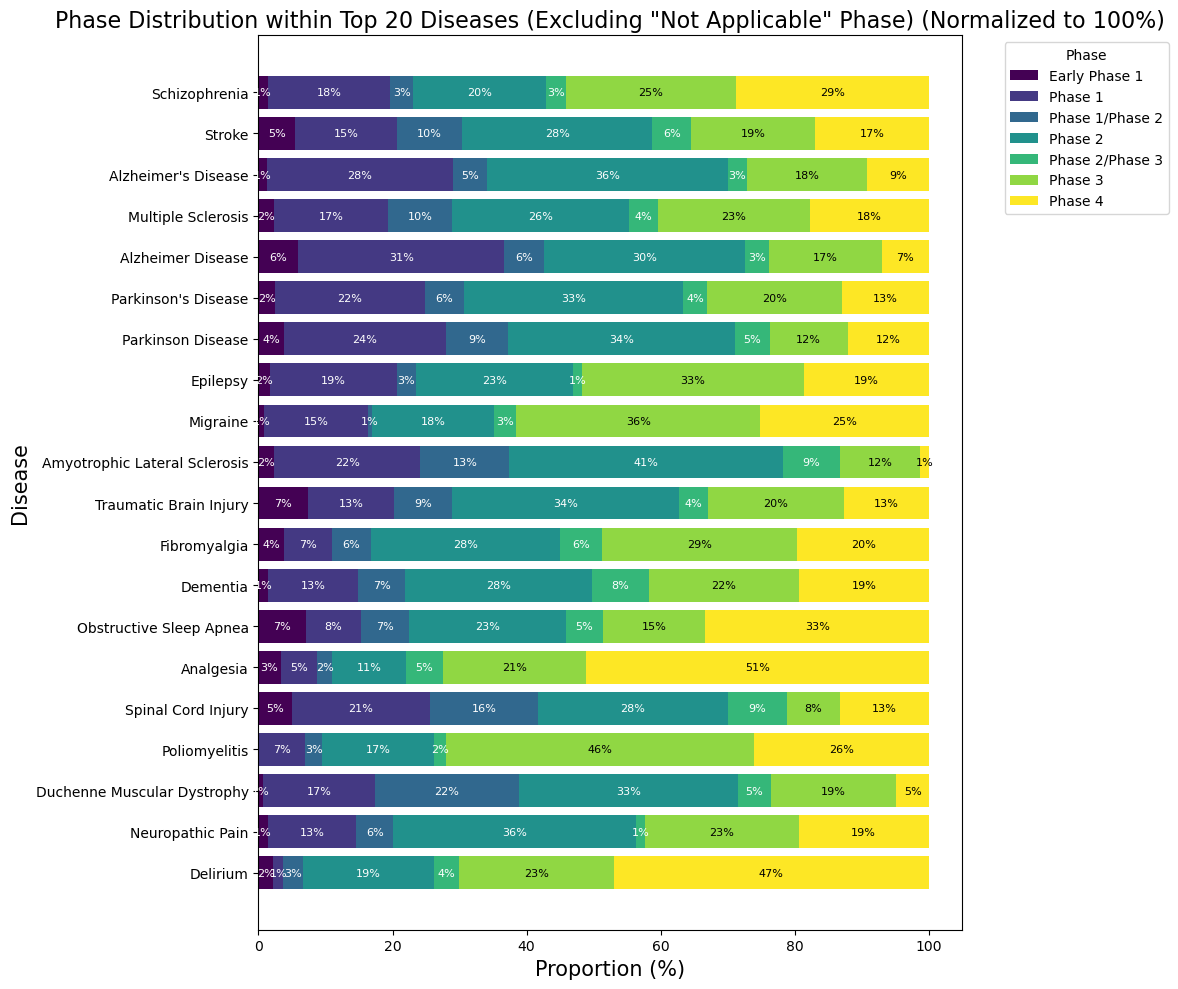

In [120]:
import numpy as np

# Assuming normalized_phases_filtered_reversed is prepared and contains the data to be plotted
# Convert the DataFrame to a numpy array for easier iteration in plotting
data_array = normalized_phases_filtered_reversed.to_numpy()

# The y-axis positions for each disease
y_positions = np.arange(len(normalized_phases_filtered_reversed))

# Setting up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Colors for each phase, assuming a limited number of phases
colors = plt.cm.viridis(np.linspace(0, 1, normalized_phases_filtered_reversed.shape[1]))

# Cumulative array to keep track of where to start the next bar segment
cumulative = np.zeros(len(normalized_phases_filtered_reversed))

for i, (phase_name, color) in enumerate(zip(normalized_phases_filtered_reversed.columns, colors)):
    # The height of the bar for this phase
    phase_data = data_array[:, i]
    
    # Plotting the bar segment
    ax.barh(y_positions, phase_data, color=color, left=cumulative, edgecolor='none', label=phase_name)
    
    # Updating the cumulative sum for the next bar segment
    cumulative += phase_data
    
    # Adding text labels within each bar segment
    for y, (x_position, width) in enumerate(zip(cumulative, phase_data)):
        if width > 0:  # Only add labels for visible segments
            label_color = 'black' if phase_name in ['Phase 3', 'Phase 4'] else 'white'
            label = f'{width:.0f}%'
            ax.text(x_position - width / 2, y, label, va='center', ha='center', color=label_color, fontsize=8)


# Setting the y-ticks to correspond to diseases
ax.set_yticks(y_positions)
ax.set_yticklabels(normalized_phases_filtered_reversed.index)

plt.xlabel('Proportion (%)', fontsize=15)
plt.ylabel('Disease', fontsize=15)
plt.title('Phase Distribution within Top 20 Diseases (Excluding "Not Applicable" Phase) (Normalized to 100%)', fontsize=16)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


## Interventions

In [121]:
aact_disease_intervention = aact_data[['nct_id', 'Neurological Disease', 'Disease Class', 'intervention_name', 'intervention_type', 'phase', 'overall_status']]

In [130]:
filtered_df = aact_disease_intervention[(aact_disease_intervention['intervention_type'] == 'Drug') | (aact_disease_intervention['intervention_type'] == 'Biological')]


In [131]:
filtered_df.head(10)

,nct_id,Neurological Disease,Disease Class,intervention_name,intervention_type,phase,overall_status
0,NCT02970292,Schizophrenia,Diseases of the nervous system,Placebo,Drug,Phase 3,Completed
3,NCT03542357,Migraine,Diseases of the nervous system|Central Nervous...,Placebo Oral Tablet,Drug,Not Applicable,Completed
9,NCT00611559,Poliomyelitis,Neuromuscular Diseases,Infanrix™ penta,Biological,Phase 4,Completed
10,NCT00611559,Poliomyelitis,Neuromuscular Diseases,Infanrix™ hexa,Biological,Phase 4,Completed
14,NCT03797521,Trichotillomania,Diseases of the nervous system,SXC-2023,Drug,Phase 2,Completed
15,NCT03797521,Trichotillomania,Diseases of the nervous system,Placebo,Drug,Phase 2,Completed
24,NCT02348593,Narcolepsy,Diseases of the nervous system|Sleep Wake Diso...,JZP-110,Drug,Phase 3,Completed
25,NCT02348593,Narcolepsy,Diseases of the nervous system|Sleep Wake Diso...,Placebo oral tablet,Drug,Phase 3,Completed
26,NCT02348593,Narcolepsy,Diseases of the nervous system|Sleep Wake Diso...,JZP-110,Drug,Phase 3,Completed
27,NCT02348593,Narcolepsy,Diseases of the nervous system|Sleep Wake Diso...,Placebo oral tablet,Drug,Phase 3,Completed


In [132]:
filtered_df['intervention_name'].isnull().sum()

0

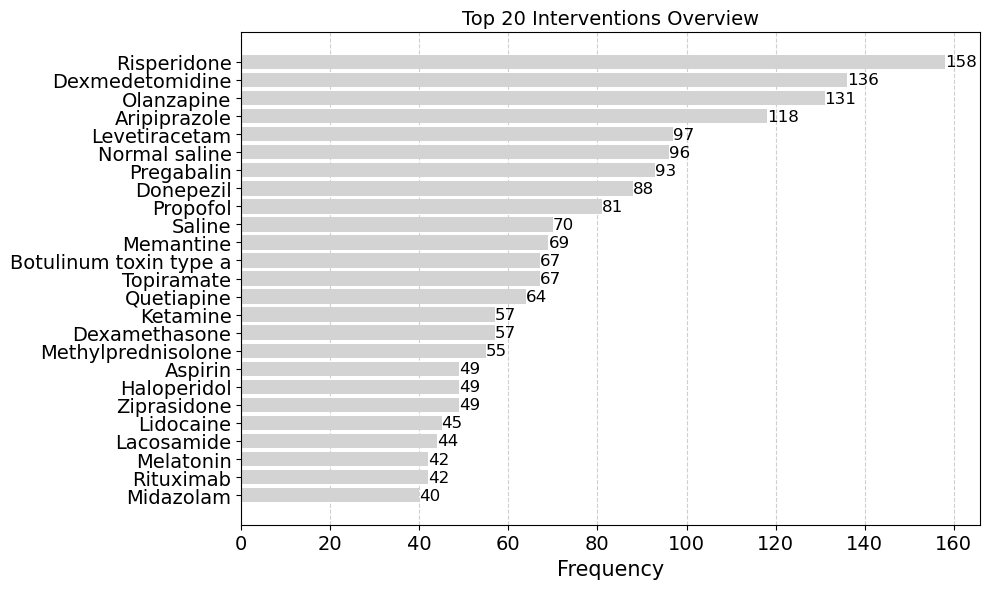

In [150]:
filtered_df = filtered_df[~filtered_df['intervention_name'].str.contains('placebo', case=False, regex=True)]
filtered_df['intervention_name'] = filtered_df['intervention_name'].str.capitalize()

# Keeping only unique nct_id, phase pairs
unique_pairs = filtered_df[['nct_id', 'intervention_name']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs['intervention_name'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True).tail(25)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title('Top 20 Interventions Overview', fontsize=14)
#plt.xlim(0, 200) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/interventions_frequency.pdf')

# Display the chart
plt.show()

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_60791/3514300219.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_unique['disease_intervention_pair'] = filtered_df_unique['Neurological Disease'] + ' - ' + filtered_df_unique['intervention_name']


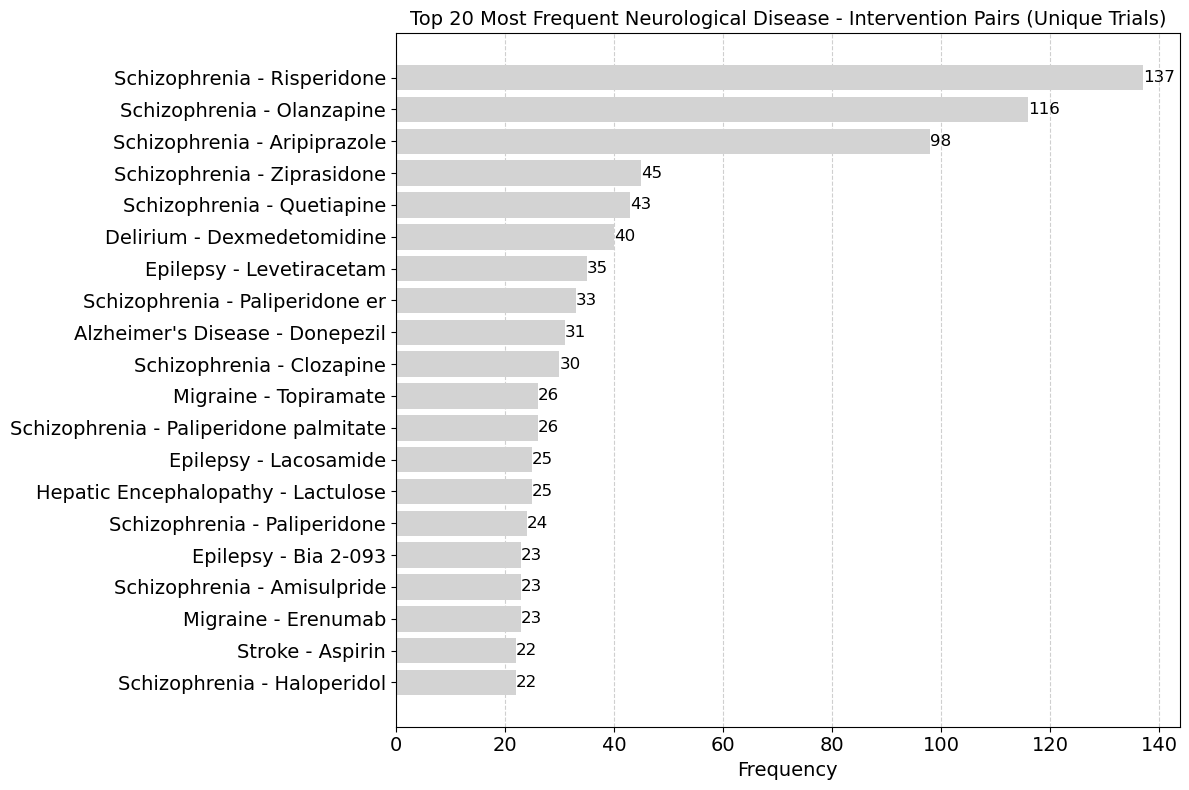

In [151]:
# Normalize 'intervention_name' to start with a capital letter
filtered_df['intervention_name'] = filtered_df['intervention_name'].str.capitalize()

# Drop duplicates based on 'nct_id' to ensure uniqueness
filtered_df_unique = filtered_df.drop_duplicates(subset=['nct_id', 'Neurological Disease', 'intervention_name'])

# Create pairs of unique 'nct_id'
filtered_df_unique['disease_intervention_pair'] = filtered_df_unique['Neurological Disease'] + ' - ' + filtered_df_unique['intervention_name']

# Count the frequency of each unique pair
pair_counts_unique = filtered_df_unique['disease_intervention_pair'].value_counts()

# Select the top 20 most frequent pairs
top_20_pairs_unique = pair_counts_unique.head(20).sort_values(ascending=True)  # Sort ascending for plot layout

# Plot with specified formatting
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_pairs_unique.index, top_20_pairs_unique, color='lightgrey', zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)

plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 20 Most Frequent Neurological Disease - Intervention Pairs (Unique Trials)', fontsize=14)
plt.tight_layout()

plt.show()
